In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sigma = 0.35
r = 0.07
T = 1.5
S0 = 100
S_init = 100
mu = 0.09
N = 80000

K = [101, 115, 130]
    
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Call, Put



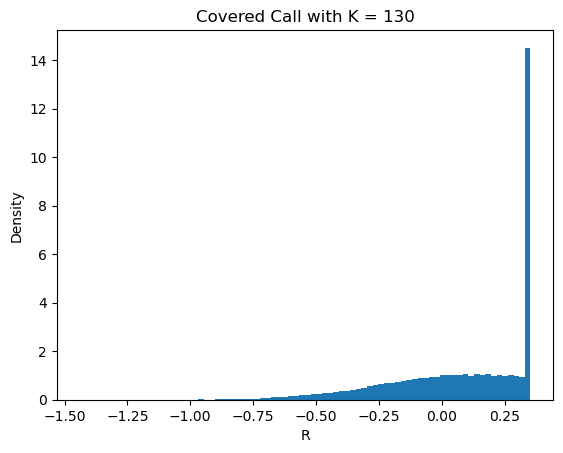

K 	 Mean 	 	 Standard Dev 	 VaR 	 	 cVaR
101 	0.09973 	0.17909 	-0.28935 	-0.40593
115 	0.09516 	0.22814 	-0.36821 	-0.49331
130 	0.08712 	0.27701 	-0.44949 	-0.59021


In [25]:
mean = []
sd = []
var = []
cvar = []

for i in K:
    V = blsprice(S0, i, r, T, sigma)[0]
    S = S0 * np.exp((mu - (sigma**2)/2)*T + sigma*np.random.normal(0, 1, N)*np.sqrt(T))
    Pi = S - np.maximum(S - i, 0) + V*np.exp(r*T)
    R = np.log(Pi/100)

    mean.append(np.mean(R))
    sd.append(np.std(R))
    
    sorted_R = np.sort(R)
    index_5th = int(len(sorted_R) * 0.05)
    var95 = sorted_R[index_5th]
    cvar95 = np.mean(sorted_R[:index_5th])
    
    var.append(var95)
    cvar.append(cvar95)
    if i == 130:
        plt.hist(R, bins = 80, density = True)
        plt.title("Covered Call with K = 130")
        plt.xlabel("R")
        plt.ylabel("Density")
        plt.show()
        

    
print("K \t Mean \t \t Standard Dev \t VaR \t \t cVaR")
for i in np.arange(len(K)):
    print("%d \t%0.5f \t%0.5f \t%0.5f \t%0.5f" % (K[i], mean[i], sd[i], var[i], cvar[i]))    



From the table, we find that as K increases, mean decreases and standard deviation increases. Also, the VaR and cVaR decreases as K increases and the absolute values of VaR and cVaR increases. 
By observing the plot, we find that there is an obvious peak of positive return and it is greater than 0.25. Also, it is possible to have large losses because there is a right tail in the plot.